Sua lai slide - Long
Giai thich code con lai - Tiep

# Import thư viện

In [26]:
from keras.models import load_model
from tkinter import *
import tkinter as tk
import win32gui
from PIL import ImageGrab, ImageOps
import numpy as np

from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import regularizers

import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import load_model
from PIL import Image, ImageDraw, ImageOps

**Xây dựng model**

In [27]:
# tải tập dũ liệu
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

Xử lý dữ liệu

In [28]:
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

onehot-encoding

In [29]:
y_train = keras.utils.to_categorical(y_train) #onehot-encoding
y_test = keras.utils.to_categorical(y_test)

Xây dựng mô hình - Quang

In [30]:
# Xác định cấu trúc mô hình
model = keras.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 1, 1, 128)        

Compile model

In [31]:
# Compile the model
model.compile(optimizer=RMSprop(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
# Define the data augmentation generator
datagen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.1)
# Define the early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=3)
# Train the model with data augmentation and early stopping
H = model.fit(datagen.flow(x_train, y_train, batch_size=32), epochs=10, validation_data=(x_test, y_test), callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.6333 - accuracy: 0.8505 - val_loss: 0.1701 - val_accuracy: 0.9625
Epoch 2/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2408 - accuracy: 0.9429 - val_loss: 0.1497 - val_accuracy: 0.9639
Epoch 3/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.1931 - accuracy: 0.9554 - val_loss: 0.1369 - val_accuracy: 0.9688
Epoch 4/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.1730 - accuracy: 0.9593 - val_loss: 0.0855 - val_accuracy: 0.9841
Epoch 5/10
1875/1875 [==============================] - 37s 19ms/step - loss: 0.1660 - accuracy: 0.9619 - val_loss: 0.0892 - val_accuracy: 0.9839
Epoch 6/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.1593 - accuracy: 0.9629 - val_loss: 0.0921 - val_accuracy: 0.9855
Epoch 7/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.1549 - accuracy: 0.9649 - val_loss: 0.0999 -

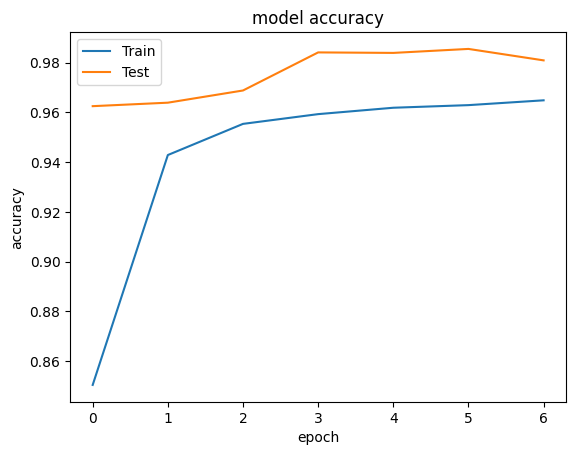

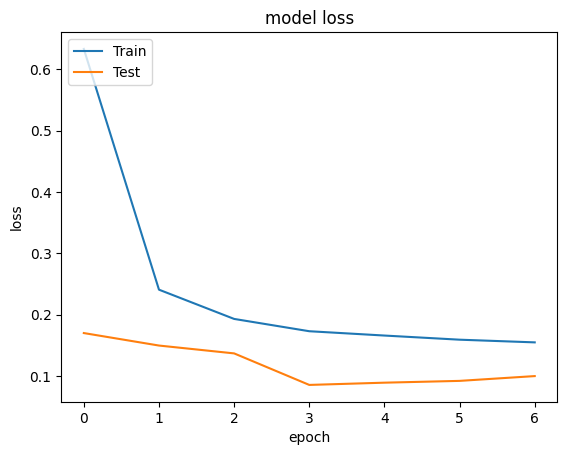

In [32]:
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Đánh giá model

In [33]:
# Evaluate the model on the test set
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

model.save('mnist8.h5')

Test loss: 0.09991855174303055
Test accuracy: 0.98089998960495


Test model dựa vào ảnh trong folder

1/1 [==============================] - 0s 207ms/step
The number is probably a 3


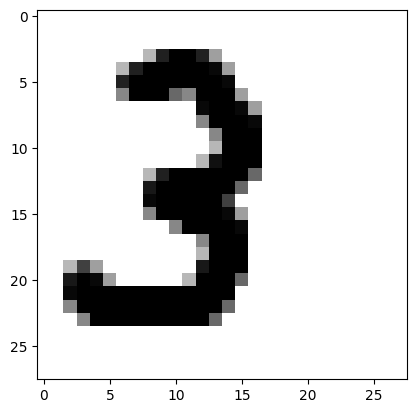

1/1 [==============================] - 0s 42ms/step
The number is probably a 4


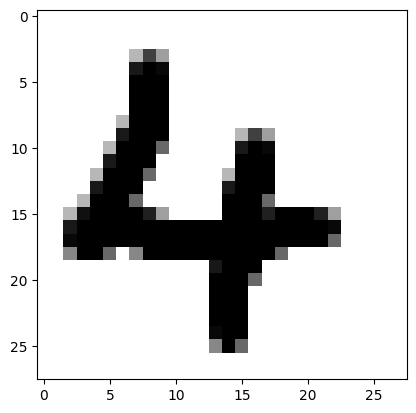

1/1 [==============================] - 0s 46ms/step
The number is probably a 5


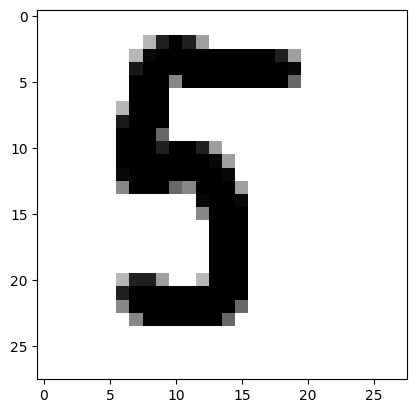

1/1 [==============================] - 0s 40ms/step
The number is probably a 6


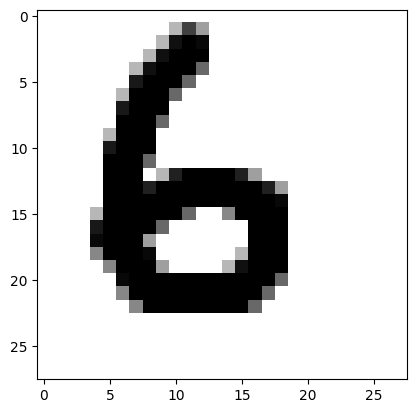

1/1 [==============================] - 0s 42ms/step
The number is probably a 7


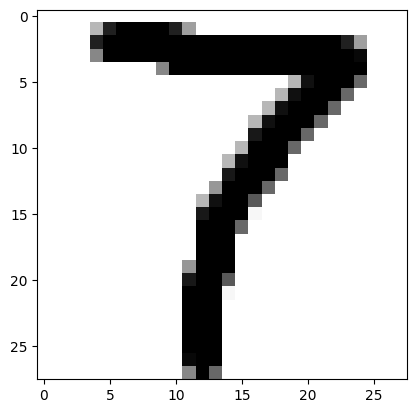

1/1 [==============================] - 0s 42ms/step
The number is probably a 8


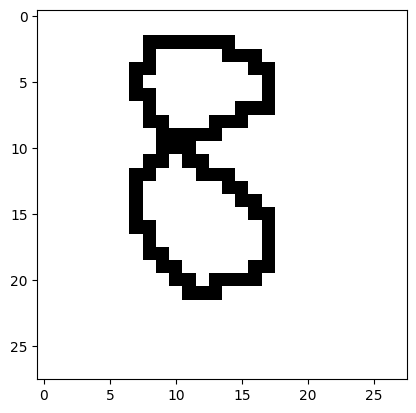

1/1 [==============================] - 0s 31ms/step
The number is probably a 7


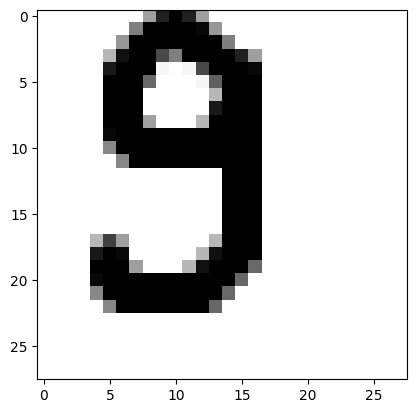

1/1 [==============================] - 0s 27ms/step
The number is probably a 1


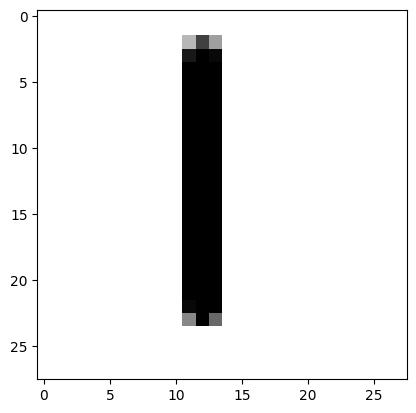

1/1 [==============================] - 0s 28ms/step
The number is probably a 2


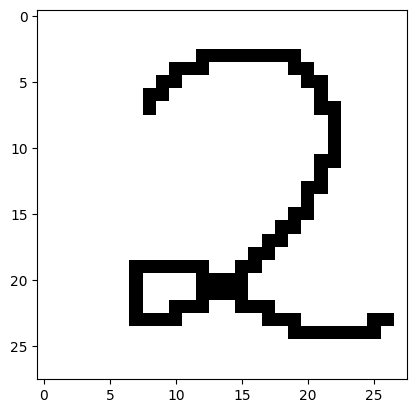

1/1 [==============================] - 0s 26ms/step
The number is probably a 3


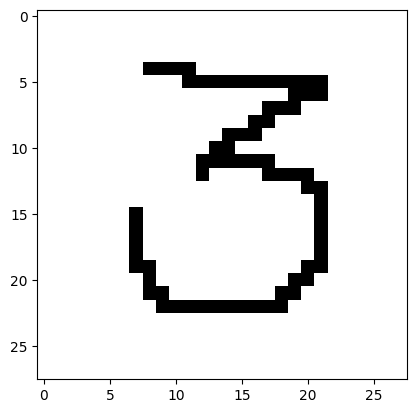

1/1 [==============================] - 0s 32ms/step
The number is probably a 2


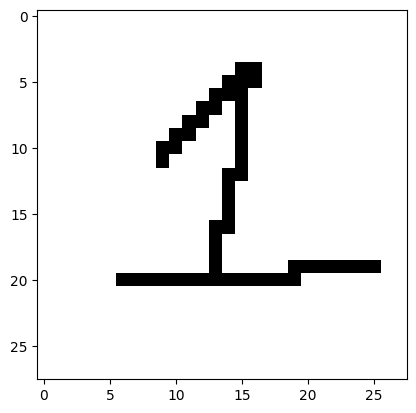

In [34]:
image_number = 1
model = load_model('mnist8.h5')
while os.path.isfile('digits/digit{}.png'.format(image_number)):
    try:
        img = cv2.imread('digits/digit{}.png'.format(image_number))[:,:,0]
        
        img = np.invert(np.array([img]))
        # print(img)
        prediction = model.predict(img)
        print("The number is probably a {}".format(np.argmax(prediction)))
        plt.imshow(img[0], cmap=plt.cm.binary)
        plt.show()
        image_number += 1
    except:
        print("Error reading image! Proceeding with next image...")

# Chạy chương trình dự đoán

284
284


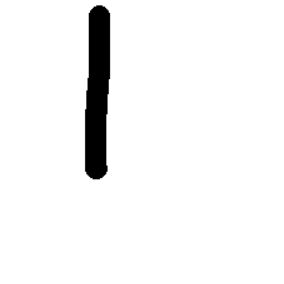

1/1 [==============================] - 0s 94ms/step
284
284


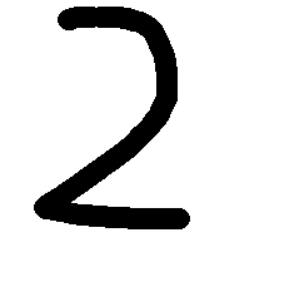

1/1 [==============================] - 0s 27ms/step
284
284


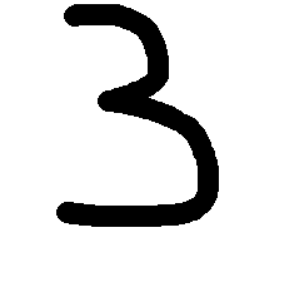

1/1 [==============================] - 0s 32ms/step
284
284


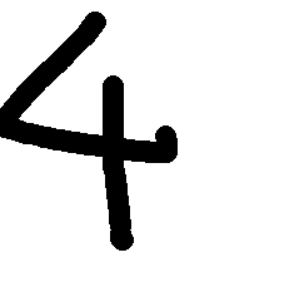

1/1 [==============================] - 0s 39ms/step
284
284


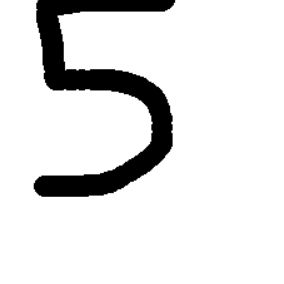

1/1 [==============================] - 0s 24ms/step
284
284


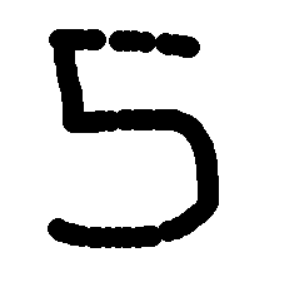

1/1 [==============================] - 0s 22ms/step
284
284


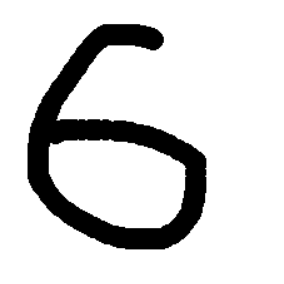

1/1 [==============================] - 0s 19ms/step
284
284


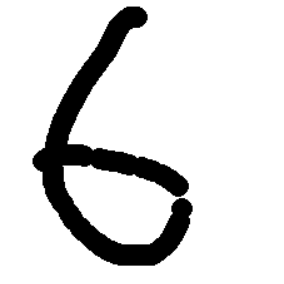

1/1 [==============================] - 0s 24ms/step
284
284


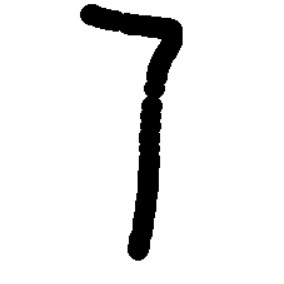

1/1 [==============================] - 0s 29ms/step
284
284


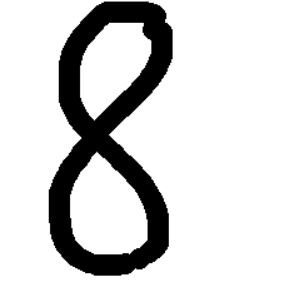

1/1 [==============================] - 0s 25ms/step
284
284


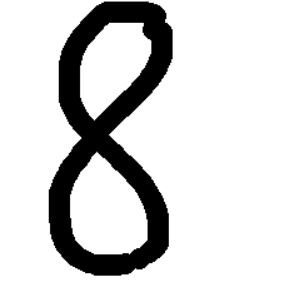

1/1 [==============================] - 0s 24ms/step
284
284


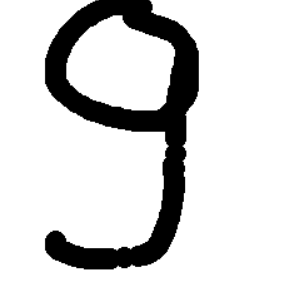

1/1 [==============================] - 0s 25ms/step
284
284


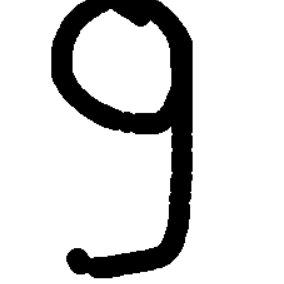

1/1 [==============================] - 0s 27ms/step
284
284


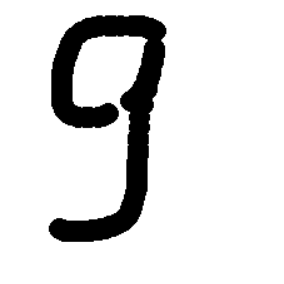

1/1 [==============================] - 0s 27ms/step
284
284


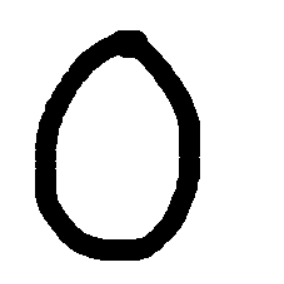

1/1 [==============================] - 0s 29ms/step
284
284


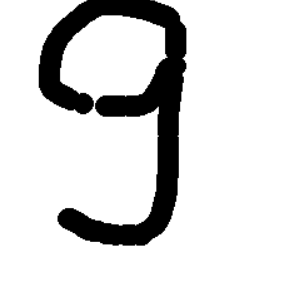

1/1 [==============================] - 0s 26ms/step
284
284


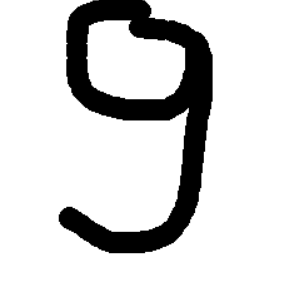

1/1 [==============================] - 0s 23ms/step
284
284


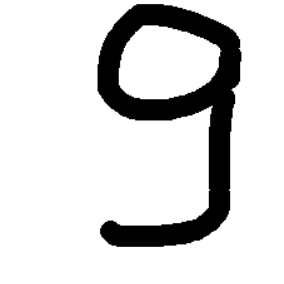

1/1 [==============================] - 0s 23ms/step
284
284


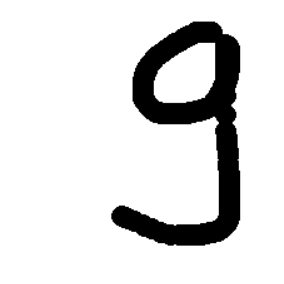

1/1 [==============================] - 0s 18ms/step


In [35]:
model = load_model('mnist8.h5')

def predict_digit(img):
    display(img)
    #resize image to 28x28 pixels
    img = img.resize((28,28))
    #convert rgb to grayscale
    img = img.convert('L')
    display(img)
    img = ImageOps.invert(img)
    img = np.array(img)
    #reshaping to support our model input and normalizing
    img = img.reshape(1,28,28,1)
    img = img/255.0
    #predicting the class
    res = model.predict([img])[0]
    return np.argmax(res), max(res)

class App(tk.Tk):
    def __init__(self):
        tk.Tk.__init__(self)

        self.x = self.y = 0

        # Creating elements
        self.canvas = tk.Canvas(self, width=280, height=280, bg = "white", cursor="cross")
        self.label = tk.Label(self, text="Thinking..", font=("Helvetica", 48))
        self.classify_btn = tk.Button(self, text = "Recognise", command = self.classify_handwriting) 
        self.button_clear = tk.Button(self, text = "Clear", command = self.clear_all)

        # Grid structure
        self.canvas.grid(row=0, column=0, pady=2, sticky=W, )
        self.label.grid(row=0, column=1,pady=2, padx=2)
        self.classify_btn.grid(row=1, column=1, pady=2, padx=2)
        self.button_clear.grid(row=1, column=0, pady=2)
        self.img_on_canvas = None
        #self.canvas.bind("<Motion>", self.start_pos)
        self.canvas.bind("<B1-Motion>", self.draw_lines)

    def clear_all(self):
        self.canvas.delete("all")

    def classify_handwriting(self):
        m = self.canvas.winfo_rootx()+80
        n = self.canvas.winfo_rooty()+80
        width = self.canvas.winfo_width()
        height = self.canvas.winfo_height()
        print(width)
        print(height)

        # Create a bounding box for the canvas
        rect = (m, n, m+width, n+height)

        # Grab the image using the bounding box
        im = ImageGrab.grab(rect)

        # Grab the image using the bounding box
        im = ImageGrab.grab(rect)

        digit, acc = predict_digit(im)
        self.label.configure(text= str(digit)+', '+ str(int(acc*100))+'%')

    def draw_lines(self, event):
        self.x = event.x
        self.y = event.y
        r=8
        self.canvas.create_oval(self.x-r, self.y-r, self.x + r, self.y + r, fill='black')

app = App()
mainloop()